#### Menentukan Harga mobil dengan model Random Forest Regresi

##### Import Library

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Import Data

In [303]:
df=pd.read_csv("harga_mobil.csv",encoding='windows-1252')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


##### Data Cleaning

Atribut car_ID di hilangkan/direduksi karena tidak perlu digunakan. 
untuk atribut CarName/CarCompany direduksi juga karena menghasilkan unknown saat dijalankan, setelah di perbaiki dengan error handle_unknown='ignore'(justru akan mengabaikan error/unknown sama saja seperti datanya tidak digunakan. jadi sebaiknya untuk mempersingkat waktu direduksi saja), saran untuk atribut carName/carCompany lebih ke Brandnya tanpa penggunaan angka lagi contoh audi 100ls jadi Audi. 

In [304]:
df = df.drop(columns=['car_ID'])
df = df.drop(columns=['CarName'])
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [305]:
df.info

<bound method DataFrame.info of      symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0            front  

##### Analisis Deskriptif

In [306]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### Korelasi

<AxesSubplot:>

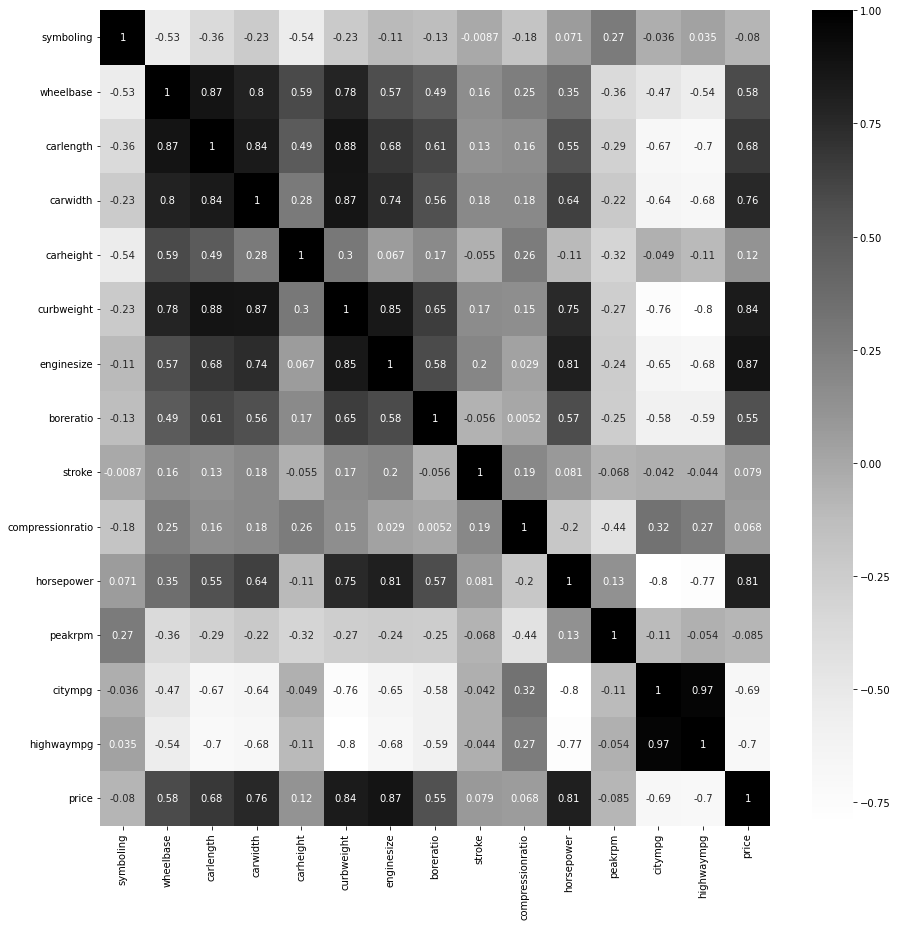

In [307]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap="Greys")

diatas terlihat yang berkorelasi positif/ berhubungan dengan harga/price yaitu :
enginesize,curbwight, horsepower,carwidth,carlength,wheelbase,boreratio,stroke,compressionratio,carheight.

##### Data Preprocessing

In [308]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 23), (41, 23), (164,), (41,))

In [309]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler

In [310]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("scaler", OneHotEncoder(handle_unknown= 'ignore'))
])

In [311]:
from sklearn.compose import ColumnTransformer

Tetapkan column yang numeric dan categoric

In [312]:
preprocessor= ColumnTransformer([ 
    ("numeric",numerical_pipeline,['enginesize','horsepower','curbweight','stroke']),
    ('categoric',categorical_pipeline,['carbody','aspiration','drivewheel'])
])

##### Modelling

In [313]:
from sklearn.ensemble import RandomForestRegressor

In [314]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

In [315]:
parameter = {
    'algo__max_depth': [4, 5, 10],
    'algo__max_features': [2, 3],
    'algo__min_samples_leaf': [3, 4, 5],
    'algo__n_estimators': [100, 200, 300],
}

##### Training

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [317]:
# pengujian dengan GridSearchCV
# model = GridSearchCV(pipeline, parameter, cv=4, n_jobs=1, verbose=1)
# model.fit(X_train, y_train)
# print(model.best_params_)
# print(model.score(X_train, y_train), model.score(X_test, y_test))

# pengujian dengan randomizedSearchCV
model = RandomizedSearchCV(pipeline, parameter, cv=4, n_iter=50, verbose=1, random_state=42)
model.fit(X_train, y_train)
print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test,y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
{'algo__n_estimators': 200, 'algo__min_samples_leaf': 3, 'algo__max_features': 3, 'algo__max_depth': 10}
0.9339772233666987 0.9273647340630492


##### Testing

In [318]:

soal_test_random = pd.DataFrame({'enginesize': [130],
                                 'horsepower': [110],
                                'curbweight': [1500],
                                 'stroke': [3],
                                 'carbody': ['sedan'],
                                 'aspiration': ['std'],
                                 'drivewheel': ['fwd']

                                 })
soal_test_random


,enginesize,horsepower,curbweight,stroke,carbody,aspiration,drivewheel
0,130,110,1500,3,sedan,std,fwd


In [319]:
prediksi = model.predict(soal_test_random)
print(prediksi)

[11474.36876873]


##### Metrics Evaluation

In [320]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [321]:
print("Test RMSE :", np.sqrt(mean_squared_error(y_test,model.predict(X_test))))
print("Train RMSE :", np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print("R2 Test :", r2_score(y_test,model.predict(X_test)))

Test RMSE : 2394.6022531364442
Train RMSE : 1984.3022997087344
R2 Test : 0.9273647340630492


Menentukan Root Mean Square Error(RMSE) adalah dengan melakukan kuadrat dari error kemudian dirata-ratakan dan diakarkan.
untuk pengujian RMSE kita mendapatkan nilai error sekitar 2394, dan untuk pelatihannya memiliki error 1984.

nilai R2 test hampir mendekati dari 1 menandakan bahwa nilai model cukup baik, R2 test ini hampir mirip dengan tingkat accuracy, dan nilainya yaitu 0.927 atau 92.7%.

jadi,jika diuji dengan RMSE artinya model ini cukup bagus karena memiliki error test yang kecil sekitar 2394. dan train/latihannya 1984. serta pengujian R2 test hampir mendekati 1 atau 92,7%.
jika dibandingkan dengan knn sepertinya lebih bagus random forest ini, karena dilihat dari metrics RMSE-nya.

In [322]:
print("Test MAE :",mean_absolute_error(y_test,model.predict(X_test)))
print("Train MAE :",mean_absolute_error(y_train,model.predict(X_train)))

Test MAE : 1600.1825600249144
Train MAE : 1393.9854700810722


Menentukan Mean Absolute Error(MAE) adalah dengan mencari nilai error lalu diabsolutkan kemudian ditambah dan dibagi menjadi rata-ratanya.
Untuk Pengujian Dengan MAE kita mendapatkan nilai test error sebesar 1600, dan untuk train/latihannya memiliki error 1393.

jadi, Jika model diuji dengan menggunakan MAE, model masih dikatakan bagus karena menghasilkan nilai error yang lumayan kecil sekitar 1600. dan nilai train/ latihannya memiliki error 1393. jika dibandingkan dengan tugas knn saya kemarin, masih lebih bagus random forest ini untuk train MAE-nya.

##### Kesimpulan

kesimpulan yang kita dapatkan yaitu dengan menggunakan random forest regresi pada data harga mobil dengan atribut/parameternya yaitu :

Model ini sudah dikatakan BAIK berdasarkan metrics - metrics pengujian seperti RMSE Dan MAE. jika dibandingkan random forest dengan knn, untuk data dari tugas ini dan sebelumnya , menurut saya lebih bagus random forest karena tugas untuk knn regresi saya kemarin lebih banyak menggunakan atribut, sedangkan ini dipersingkat untuk mendapat nilai best scorenya. dan untuk random forest sendiri lebih menekankan ke variabel numeric jika di pertemukan dengan data yang terlalu banyak kategoriknya dia akan bias. untuk random forest sendiri sangat direkomendasikan menurut saya dari pada knn karena dia meningkatkan nilai modelnya dengan tree yang terbentuk, semakin banyak tree yang terbentuk maka akan membuat nilai modelnya semakin baik.